![MLTrain logo](https://mltrain.cc/wp-content/uploads/2017/11/mltrain_logo-4.png "MLTrain logo")

---------------------------------------------------------

In [1]:
!wget -q -O changeNBLayout.py https://raw.githubusercontent.com/cmalliopoulos/PfBDAaML/master/changeNBLayout.py
% run changeNBLayout.py

# Categorical Data Plots #

Seaborn provides quite a few alternatives for plotting categories.  
We'll go through the basic usage of the following graph types: 
1. factorplot
2. boxplot
3. violinplot
4. stripplot
5. swarmplot
6. barplot
7. countplot

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

----------------------------------------
### Dataset ###

In [3]:
tips = sns.load_dataset('tips')
print tips.head()

# Use seaborn's default drawing style
sns.set()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## barplot and countplot ##

Similar plots for getting aggregate data off a categorical feature.  

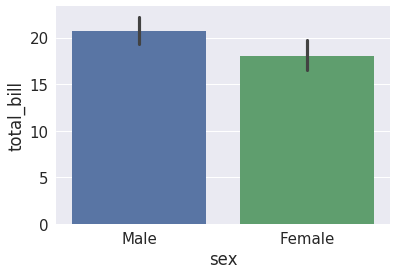

In [4]:
# By default the absisa is the mean value of the scalar (here total_bill).
# Error bars are the 95% confidence interval values (ie the 2.5th and 97.5th percentiles) of the bottstrap estimator of the aggregate.
# By default the aggregate is mean, however any aggregates are possible

sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x = 'sex', y = 'total_bill', data = tips)

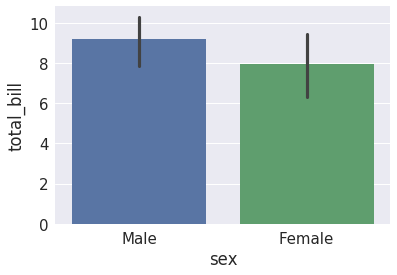

In [5]:
# Use np.std as estimator (instead of mean)
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

### countplot ###
A specialization of boxplot for counts

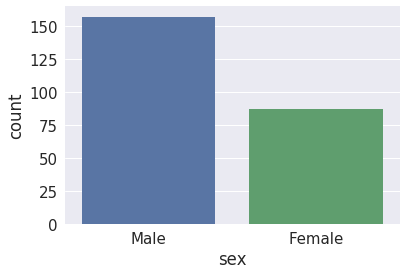

In [6]:
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(x = 'sex', data = tips)

### boxplot ###

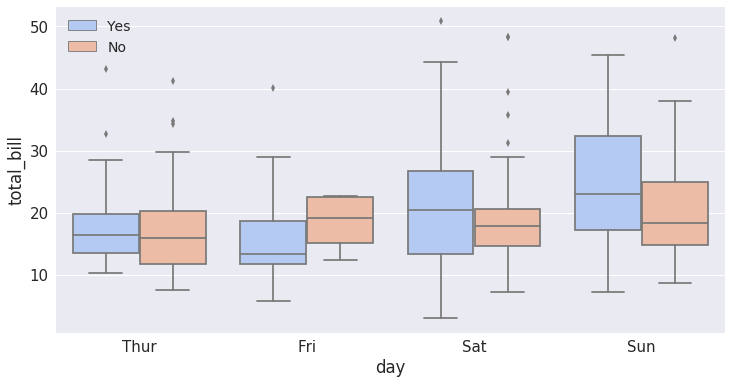

In [7]:
sns.set_context('notebook',font_scale = 1.5)
plt.figure(figsize = [12, 6])
sns.boxplot(x = "day", y = "total_bill", hue = "smoker", data = tips, palette = "coolwarm", width = .8)

# Make legend readable
plt.legend(prop = {'size': 14})

### violinplot ###

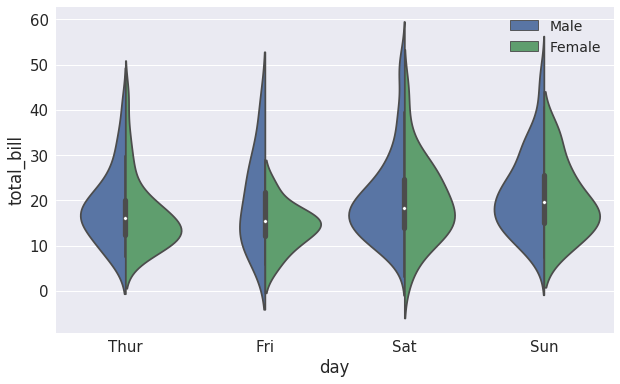

In [8]:
sns.set_context('notebook',font_scale = 1.5)
plt.figure(figsize = [10, 6])
sns.violinplot(x = "day", y = "total_bill", data = tips, hue = 'sex', split = True)

# Make legend readable
plt.legend(prop = {'size': 14})

### stripplot ###

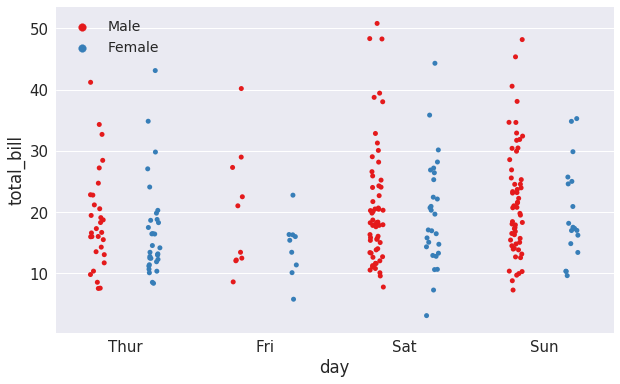

In [9]:
sns.set_context('notebook',font_scale = 1.5)
plt.figure(figsize = [10, 6])
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True, hue = 'sex', palette = 'Set1', dodge = True)

# Make legend readable
plt.legend(prop = {'size': 14})

### swarmplot ###

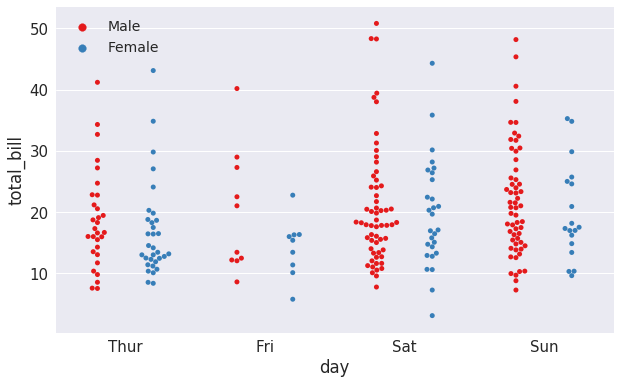

In [10]:
sns.set_context('notebook',font_scale = 1.5)
plt.figure(figsize = [10, 6])
sns.swarmplot(x = "day", y = "total_bill", hue = 'sex', data = tips, palette = "Set1", dodge = True)
plt.legend(prop = {'size': 14})

--------------------------------
# Distribution plots #

1. __distplot:__ histograms, kernel-desnsities and rug plots of scalars
2. __jointplot:__ cross-tabulations (scatterplots) of scalars together with their marginals
3. __pairplot:__ multiple cross-tabulations of scalars with histograms
4. __facetgrid:__ cross-tabulations of categoricals

### distplot ###

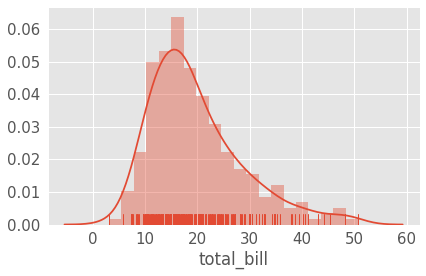

In [11]:
plt.style.use('ggplot')
sns.set_context('notebook',font_scale = 1.5)
plt.figure(figsize = plt.figaspect(.6))

sns.distplot(tips['total_bill'], bins = 20, kde = True, rug = True)

### jointplot ###

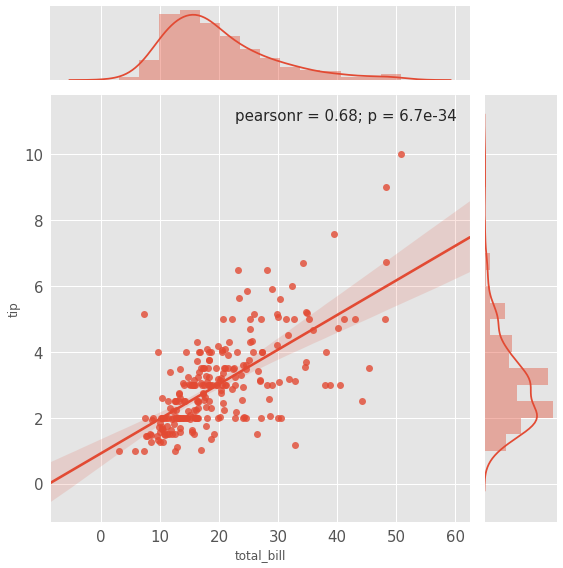

In [12]:
with plt.style.context('ggplot'):
    sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg', size = 8)


### pairplot ###
pairplots are appropriate for cross-tabulating scalar quantities optionally colored (hued) by the categories of a discrete variable.  
Below it is evidenced that the 'sentosa' species of Fisher's 'iris' dataset can be classified by either the sepal length or width.


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


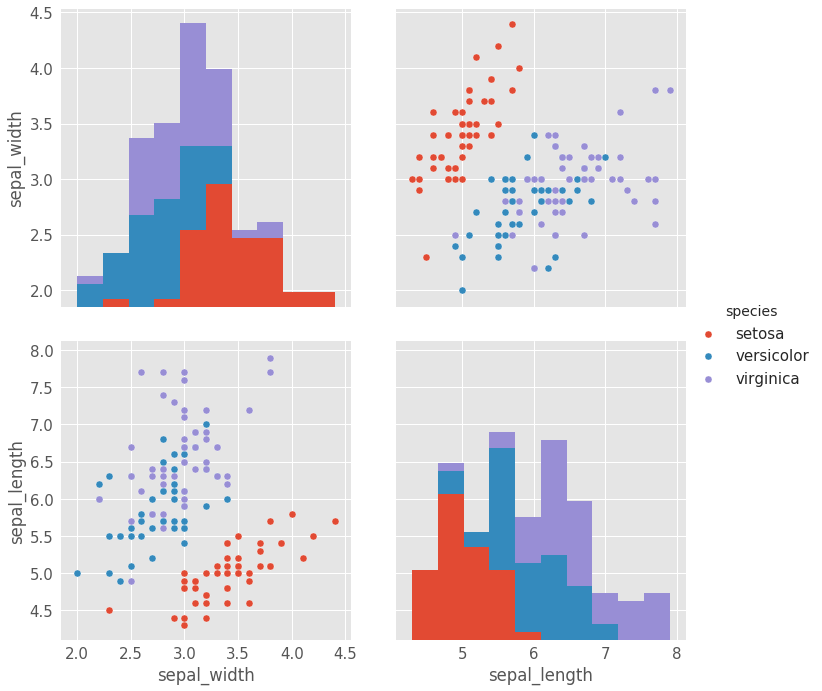

In [13]:
iris = sns.load_dataset("iris")
print iris.head()

with plt.style.context('ggplot'):
    sns.set_context('notebook',font_scale = 1.5)
    # sns.pairplot(iris, hue = 'species', size = 3, kind = 'scatter', diag_kind = 'kde')
    sns.pairplot(iris, vars = ["sepal_width", "sepal_length"], hue = 'species', size = 5)

### facetgrid ###

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


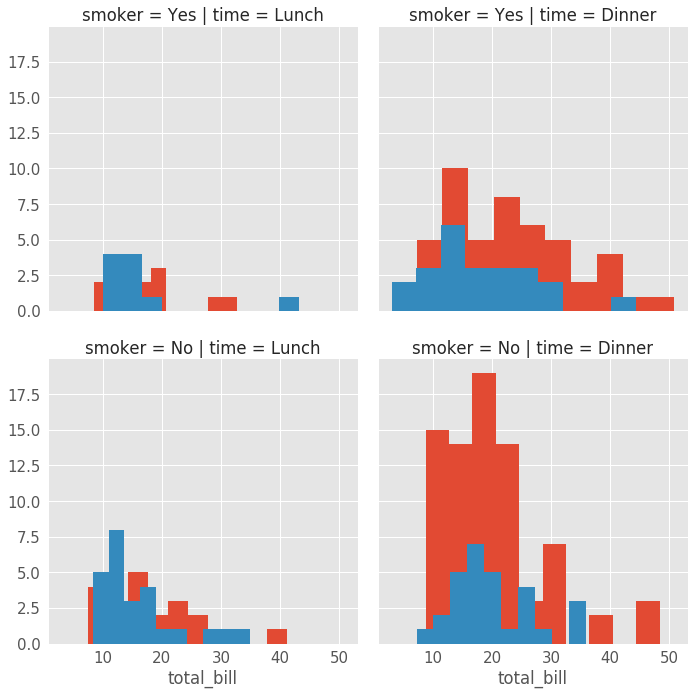

In [14]:
print tips.head()
sns.set_context('notebook',font_scale = 1.5)
g = sns.FacetGrid(tips, col = "time",  row = "smoker", hue = 'sex', size = 5)
g = g.map(plt.hist, "total_bill")

------------------------
# Matrix Plots #

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data.  
We'll give short descriptions of seaborn's `heatmap` and `clustermap` plots

In [29]:
from os import linesep as endl

flights = sns.load_dataset('flights')
flights['month'] = flights.month.astype(str).map(lambda arg_: arg_[:3].upper())

tips = sns.load_dataset('tips')

In [30]:
print 'tips', endl, tips.sample(5)
print endl, 'flights', endl, flights.head()

tips 
     total_bill   tip     sex smoker  day    time  size
14        14.83  3.02  Female     No  Sun  Dinner     2
225       16.27  2.50  Female    Yes  Fri   Lunch     2
61        13.81  2.00    Male    Yes  Sat  Dinner     2
53         9.94  1.56    Male     No  Sun  Dinner     2
221       13.42  3.48  Female    Yes  Fri   Lunch     2

flights 
   year month  passengers
0  1949   JAN         112
1  1949   FEB         118
2  1949   MAR         132
3  1949   APR         129
4  1949   MAY         121


## Heatmap

In order for a heatmap to work properly, the data must be in a matrix form, the sns.heatmap function basically just colors it in. For example:

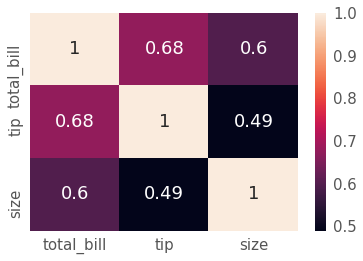

In [31]:
sns.heatmap(tips.corr(), annot = True)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
APR     129   135   163   181   235   227   269   313   348   348   396   461
AUG     148   170   199   242   272   293   347   405   467   505   559   606
DEC     118   140   166   194   201   229   278   306   336   337   405   432
FEB     118   126   150   180   196   188   233   277   301   318   342   391
JAN     112   115   145   171   196   204   242   284   315   340   360   417
JUL     148   170   199   230   264   302   364   413   465   491   548   622
JUN     135   149   178   218   243   264   315   374   422   435   472   535
MAR     132   141   178   193   236   235   267   317   356   362   406   419
MAY     121   125   172   183   229   234   270   318   355   363   420   472
NOV     104   114   146   172   180   203   237   271   305   310   362   390
OCT     119   133   162   191   211   229   274   306   347   35

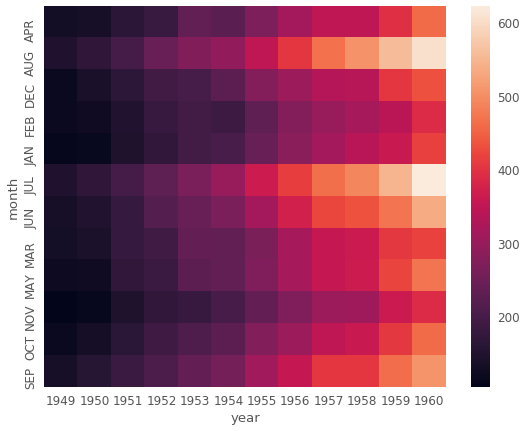

In [32]:
import pandas as pd
pd.set_option('display.width', 124)

# DataFrame.pivot_table pivots the categories to columns. 
# The cells of the pivot are specified in 'values'. 
# Generally there's an 'aggfunc' argument denoting the aggregation to compute but here it is None
print flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')

pvflights = flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')

sns.set_context(context = 'notebook', font_scale = 1.2)
plt.figure(figsize = [9, 7])
sns.heatmap(pvflights, )

## clustermap

`clustermap` uses hierarchal clustering to produce a clustered version of the heatmap

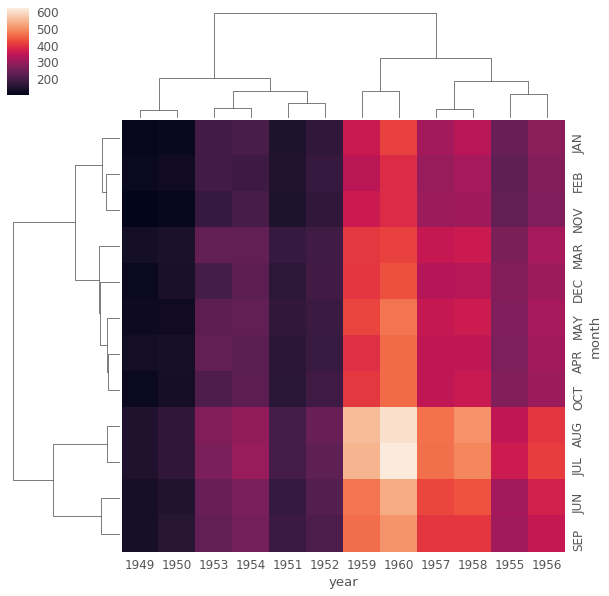

In [33]:
sns.clustermap(pvflights)

Now how the _years_ and _months_ are no longer in order, instead they are grouped by similarity in value (passenger count).  
That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

-------------------------------------------
# Regression plots: mlplot #

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based on features, as well as coloring the hue based on features.

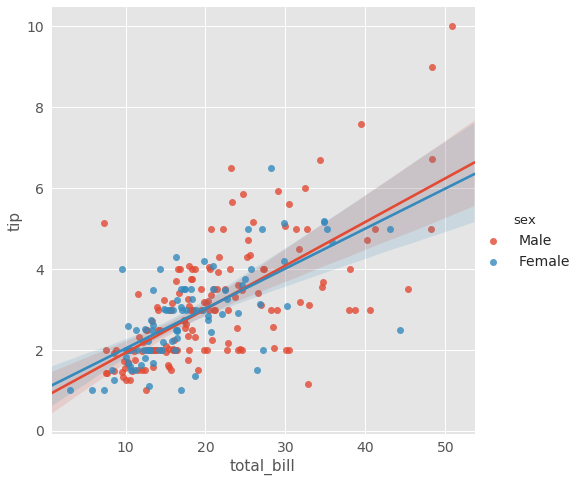

In [34]:
sns.set_context(context = 'notebook', font_scale = 1.4)
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', size = 7)

### Using a Grid ###

We can add more variable segregation through columns and rows with the use of a grid.  
Just indicate this with the col or row arguments:

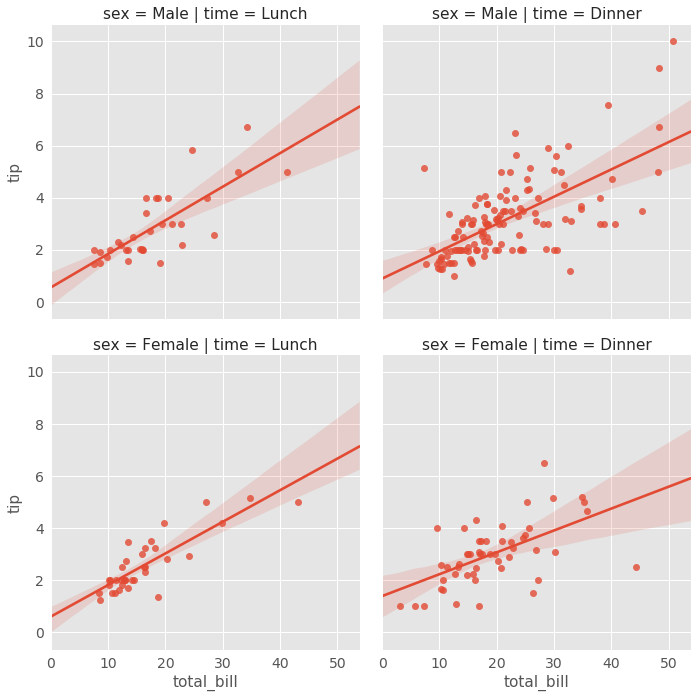

In [35]:
sns.lmplot(x = "total_bill", y = "tip", row = "sex", col = "time", data = tips)